In [2]:
#import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df_train = pd.read_csv('Dataset/train.csv')
df_test = pd.read_csv('Dataset/test.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

#### Merge Dataset

In [7]:
df_main = pd.concat([df_train.drop(['SalePrice'], axis=1), df_test], ignore_index=True)
df_main.shape

(2919, 79)

In [10]:
df_main.index.duplicated().sum()

0

In [12]:
pd.set_option('display.max_rows', 200)
df_main.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,NaN,NaN,NaN,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
MSZoning,2915,5,RL,2265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,2433.0,NaN,NaN,NaN,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,NaN,NaN,NaN,10168.11408,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
Street,2919,2,Pave,2907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,198,2,Grvl,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,2919,4,Reg,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,2919,4,Lvl,2622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,2917,2,AllPub,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,2919,5,Inside,2133,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**DataFrame.describe()** generates a descriptive statistics of the dataframe. <br>
***For Numeric Data*** <br>
**count** - The number of not-empty values. <br>
**mean** - The average (mean) value. <br>
**std** - The standard deviation. <br>
**min** - the minimum value. <br>
**25%** - The 25% percentile. <br>
**50%** - The 50% percentile. <br>
**75%** - The 75% percentile. <br>
**max** - the maximum value. <br>

***For Object Data*** <br>
**top** - most common value <br>
**freq** - top value's frequency <br>
**unique** - unique values of the feature/column

# Preprocessing 

#### Duplicates

In [13]:
df_main.duplicated().sum()

2

In [14]:
df_main.drop_duplicates(inplace=True)

#### Missing Values

In [ ]:
df_main.isna().sum()

#### Missing Value Percentage

In [17]:
missing_by_cols = df_main.isna().sum().sort_values()/len(df_main)
missing_by_cols = missing_by_cols[missing_by_cols>0]
missing_by_cols

GarageCars      0.000343
GarageArea      0.000343
KitchenQual     0.000343
BsmtFinSF1      0.000343
Electrical      0.000343
SaleType        0.000343
Exterior1st     0.000343
BsmtFinSF2      0.000343
TotalBsmtSF     0.000343
Exterior2nd     0.000343
BsmtUnfSF       0.000343
Utilities       0.000686
BsmtFullBath    0.000686
Functional      0.000686
BsmtHalfBath    0.000686
MSZoning        0.001371
MasVnrArea      0.007885
BsmtFinType1    0.027083
BsmtFinType2    0.027425
BsmtQual        0.027768
BsmtExposure    0.028111
BsmtCond        0.028111
GarageType      0.053822
GarageCond      0.054508
GarageFinish    0.054508
GarageYrBlt     0.054508
GarageQual      0.054508
LotFrontage     0.166610
FireplaceQu     0.486116
MasVnrType      0.605074
Fence           0.804251
Alley           0.932465
MiscFeature     0.964004
PoolQC          0.996572
dtype: float64

In [23]:
missing_by_col_first = missing_by_cols.head(len(missing_by_cols)//2+1)
missing_by_col_second = missing_by_cols.tail(len(missing_by_cols)//2)

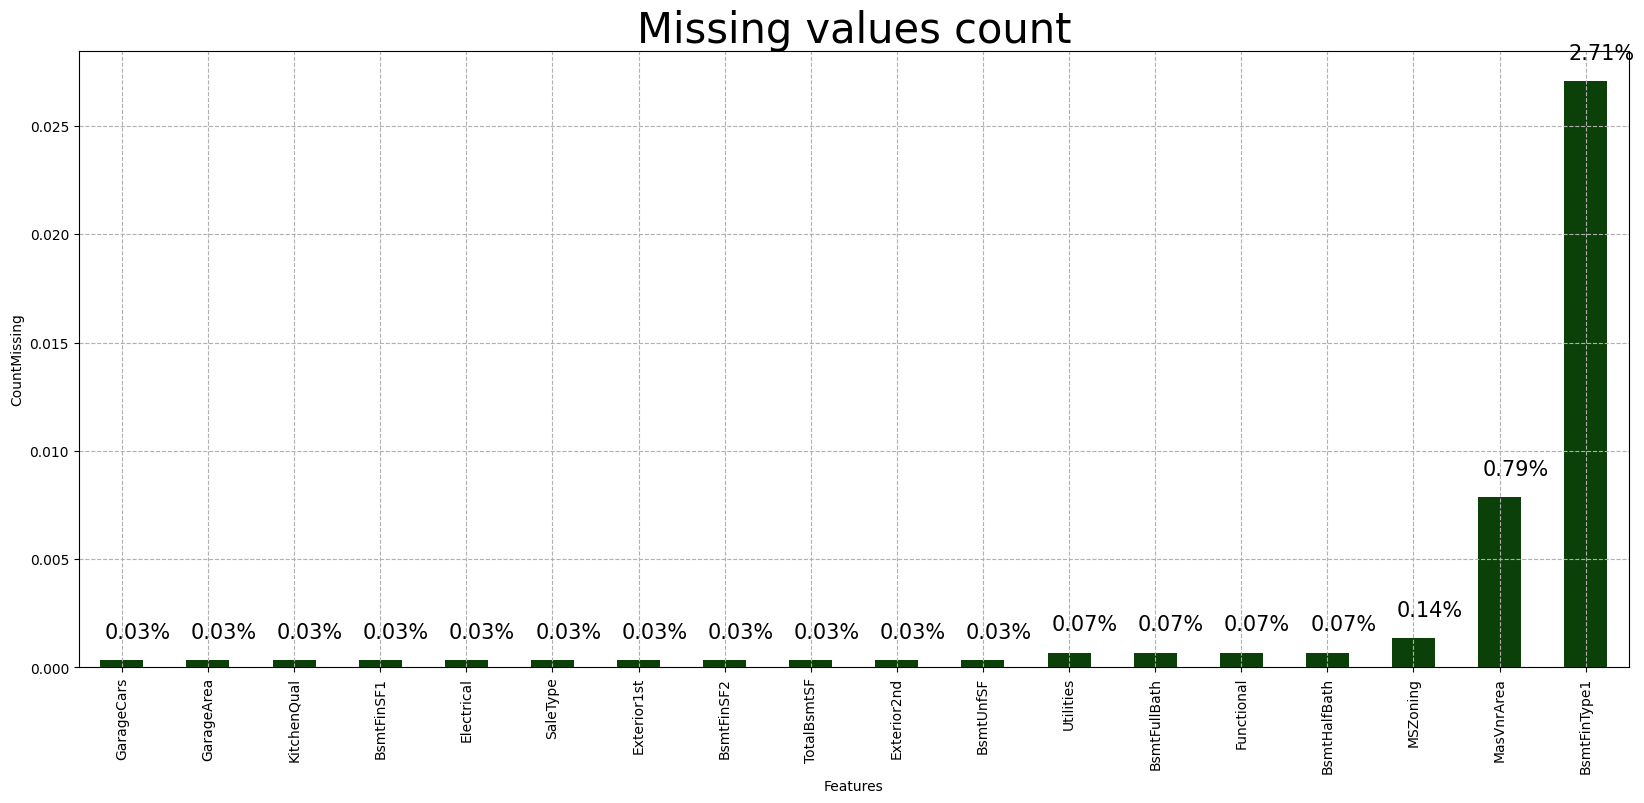

Text(0, 0.5, 'CountMissing')

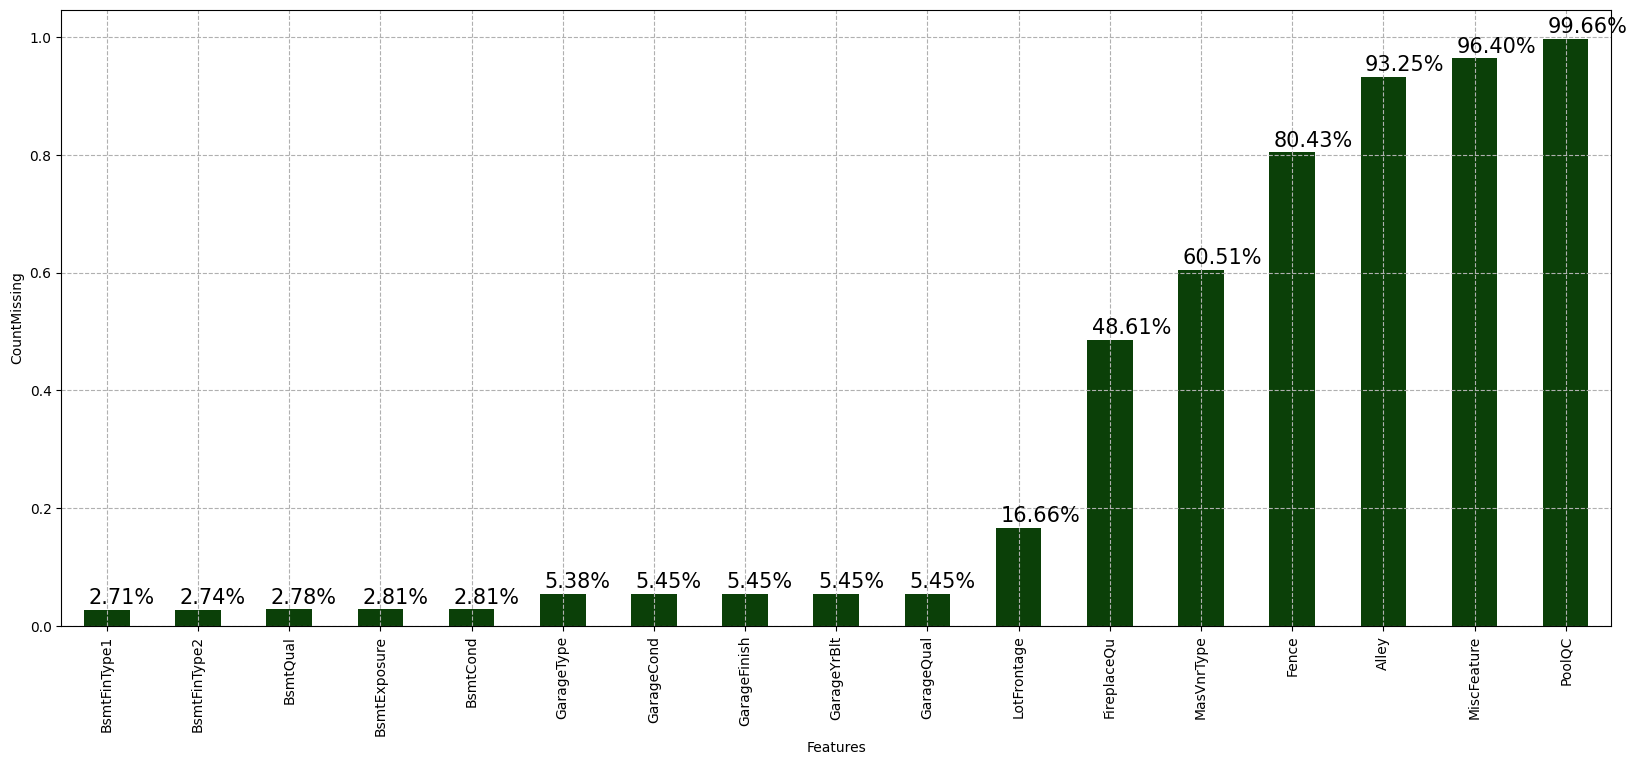

In [24]:
plt.figure(figsize=(20, 8))
plt.title('Missing values count', fontdict=dict(fontsize=30))
missing_by_col_first.plot(kind = 'bar', color='xkcd:hunter green')
plt.grid(True, which='both', linestyle='--')
plt.xlabel('Features')
plt.ylabel('CountMissing')

for index,data in enumerate(missing_by_col_first):
    plt.text(x=index - 0.2, y = data + 0.001, s=f"{data * 100:.{2}f}%" , fontdict=dict(fontsize=15))
plt.show()

plt.figure(figsize=(20, 8))
missing_by_col_second.plot(kind = 'bar', color='xkcd:hunter green')
plt.grid(True, which='both', linestyle='--')
for index,data in enumerate(missing_by_col_second):
    plt.text(x=index - 0.2, y = data + 0.01, s=f"{data * 100:.{2}f}%" , fontdict=dict(fontsize=15))
plt.xlabel('Features')
plt.ylabel('CountMissing')

## Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
for col in df_main.columns:
    if df_main[col].dtype == 'O':
        series = df_main[col]
        label_encoder = LabelEncoder()
        df_main[col] = pd.Series(label_encoder.fit_transform(series[series.notnull()]), index=series[series.notnull()].index)

In [27]:
df_main.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3.0,65.0,8450,1,NaN,3,3,0.0,4,...,0,0,NaN,NaN,NaN,0,2,2008,8.0,4
1,20,3.0,80.0,9600,1,NaN,3,3,0.0,2,...,0,0,NaN,NaN,NaN,0,5,2007,8.0,4
2,60,3.0,68.0,11250,1,NaN,0,3,0.0,4,...,0,0,NaN,NaN,NaN,0,9,2008,8.0,4
3,70,3.0,60.0,9550,1,NaN,0,3,0.0,0,...,0,0,NaN,NaN,NaN,0,2,2006,8.0,0
4,60,3.0,84.0,14260,1,NaN,0,3,0.0,2,...,0,0,NaN,NaN,NaN,0,12,2008,8.0,4


## Imputation

In [28]:
from sklearn.impute import KNNImputer

In [29]:
imputer = KNNImputer(n_neighbors=10, weights='distance')
imputed_wdis = imputer.fit_transform(df_main)

In [30]:
df_main = pd.DataFrame(imputed_wdis, columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'])
df_main.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2917.0,57.067192,42.446750,20.0,20.000000,50.000000,70.000000,190.0
MSZoning,2917.0,3.028174,0.657264,0.0,3.000000,3.000000,3.000000,4.0
LotFrontage,2917.0,70.084261,22.464599,21.0,60.000000,70.000000,80.000000,313.0
LotArea,2917.0,10173.348989,7887.164614,1300.0,7488.000000,9457.000000,11577.000000,215245.0
Street,2917.0,0.995886,0.064018,0.0,1.000000,1.000000,1.000000,1.0
Alley,2917.0,0.312655,0.252868,0.0,0.168039,0.278083,0.396367,1.0
LotShape,2917.0,1.946863,1.409935,0.0,0.000000,3.000000,3.000000,3.0
LandContour,2917.0,2.776826,0.704608,0.0,3.000000,3.000000,3.000000,3.0
Utilities,2917.0,0.000343,0.018515,0.0,0.000000,0.000000,0.000000,1.0
LotConfig,2917.0,3.055194,1.604832,0.0,2.000000,4.000000,4.000000,4.0


## Visualize Data Distribution

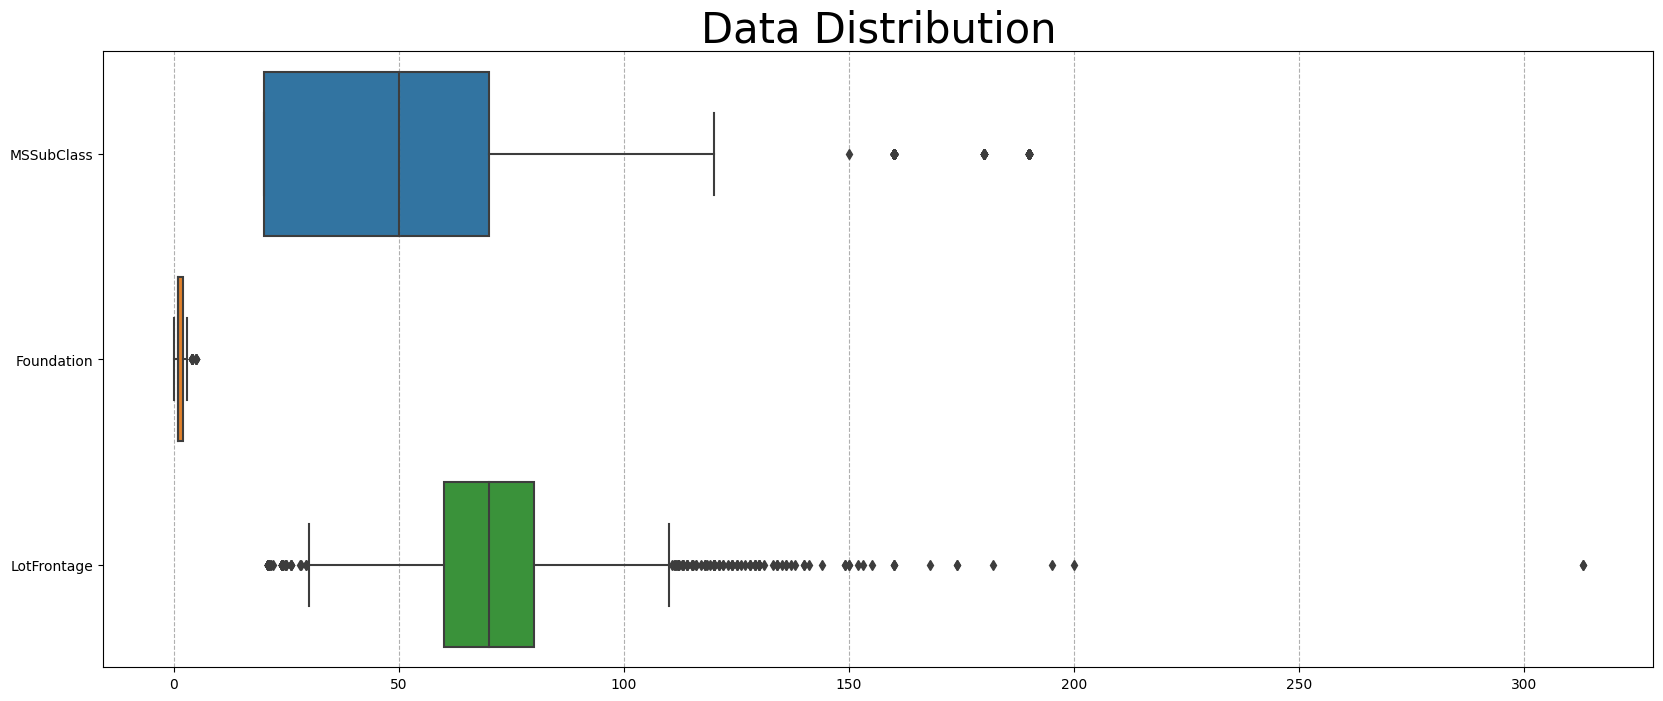

In [36]:
plt.figure(figsize=(20,8))
plt.title('Data Distribution', fontdict=dict(fontsize=30))
plt.grid(True, which='both', linestyle='--')
sns.boxplot(data=df_main[['MSSubClass', 'Foundation', 'LotFrontage']], orient='h')
plt.show()

# PCA

In [40]:
from sklearn.decomposition import PCA

In [38]:
#convert dtypes to float32
for i in df_main.columns:
    df_main[i] = df_main[i].astype('float32')
df_main.dtypes

MSSubClass       float32
MSZoning         float32
LotFrontage      float32
LotArea          float32
Street           float32
Alley            float32
LotShape         float32
LandContour      float32
Utilities        float32
LotConfig        float32
LandSlope        float32
Neighborhood     float32
Condition1       float32
Condition2       float32
BldgType         float32
HouseStyle       float32
OverallQual      float32
OverallCond      float32
YearBuilt        float32
YearRemodAdd     float32
RoofStyle        float32
RoofMatl         float32
Exterior1st      float32
Exterior2nd      float32
MasVnrType       float32
MasVnrArea       float32
ExterQual        float32
ExterCond        float32
Foundation       float32
BsmtQual         float32
BsmtCond         float32
BsmtExposure     float32
BsmtFinType1     float32
BsmtFinSF1       float32
BsmtFinType2     float32
BsmtFinSF2       float32
BsmtUnfSF        float32
TotalBsmtSF      float32
Heating          float32
HeatingQC        float32


In [42]:
#PCA
pca = PCA(n_components = 3)
x_pca = pca.fit_transform(df_main)
x_pca.shape

(2917, 3)

/tmp/ipykernel_32443/59444205.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


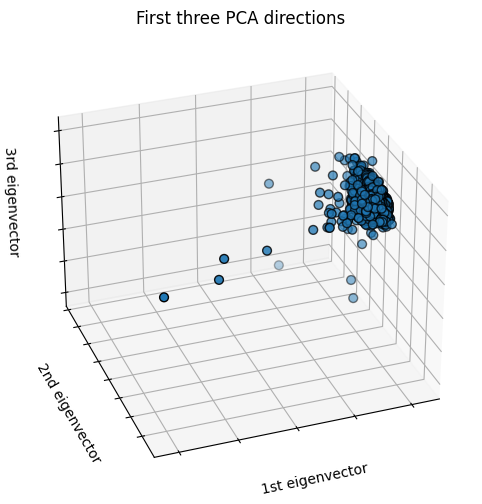

In [44]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    x_pca[:, 0],
    x_pca[:, 1],
    x_pca[:, 2],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()